In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000)   #設定最大能顯示1000columns
from sklearn import tree
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder       #轉字串為數字
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [110]:
train_data = pd.read_csv("train+new.csv")    # 匯入csv檔，將千分位記號捨去
test_data = pd.read_csv("test+new.csv")    # 匯入csv檔，將千分位記號捨去
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [111]:
print(train_data.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object


# 查看缺失值的數量

In [112]:
print(train_data.isnull().sum())         # 計算個欄位空值總數
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
WikiId           3
Name_wiki        3
Age_wiki         3
Hometown         3
Boarded          3
Destination      3
Lifeboat       261
Body           375
Class            3
dtype: int64

# 平衡度

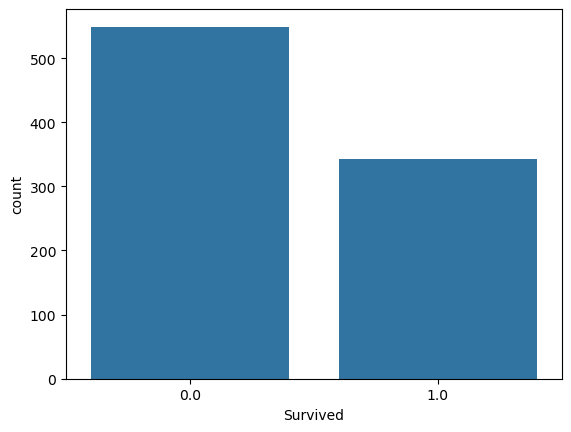

In [113]:
sns.countplot(
   x =  train_data["Survived"].values,
).set_xlabel("Survived");


# 合併訓練集和測試集以進行預處理

In [114]:
# 前處理
all_data = pd.concat([train_data,test_data])  # concat把train test拼起來 先一起補資料(NaN)
all_data.index = all_data["PassengerId"] # 把Id設為index
all_data = all_data.drop("PassengerId",axis =1) # 把Id這行刪掉

# 了解缺失值比例
null_rate = all_data.isnull().sum() / len(all_data) *100
print(null_rate)

all_data.head()

Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
WikiId          0.381971
Name_wiki       0.381971
Age_wiki        0.534759
Hometown        0.381971
Boarded         0.381971
Destination     0.381971
Lifeboat       61.650115
Body           90.068755
Class           0.381971
dtype: float64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [115]:
# 刪除不必要欄位
all_data.drop(['Survived','Cabin','Body', 'Ticket','Age_wiki','Name_wiki','WikiId','Class','Hometown','Destination'], axis=1, inplace=True)
display(all_data)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Boarded,Lifeboat
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Southampton,NaN
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Cherbourg,4
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Southampton,14?
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Southampton,D
5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Southampton,NaN
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Southampton,NaN
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Cherbourg,8
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Southampton,NaN


# 填補缺失值

In [116]:
null_vals = all_data.isna().sum().sort_values(ascending=False)
null_vals[null_vals > 0 ]

Lifeboat    807
Age         263
Boarded       5
Embarked      2
Fare          1
dtype: int64

In [117]:
# 用 None 填充 Lifeboat 字段的空值
all_data['Lifeboat'] = all_data['Lifeboat'].fillna('None')
display(all_data['Lifeboat'])

PassengerId
1       None
2          4
3        14?
4          D
5       None
        ... 
1305    None
1306       8
1307    None
1308    None
1309       D
Name: Lifeboat, Length: 1309, dtype: object

In [118]:
# 對於缺失值較少的字段，使用眾數填充缺失值

for col in null_vals[(null_vals < 10) & ( null_vals > 0)].index : 
    all_data[col] = all_data.groupby(["Pclass","Sex"])[col].transform(
        lambda x: x.fillna(x.mode()[0]))
    
all_data.isna().sum().sort_values(ascending=False)

Age         263
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Boarded       0
Lifeboat      0
dtype: int64

# 特徵工程

In [119]:
# 將家人數量合併
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1

# 創建 "IsAlone" 特徵
all_data['IsAlone'] = 1
all_data['IsAlone'].loc[all_data['FamilySize'] > 1] = 0
all_data['IsAlone'] = 1
all_data['IsAlone'].loc[all_data['FamilySize'] > 1] = 0

all_data.head()

/var/folders/th/sps8d22j2ys5kpfxcnr38nd40000gn/T/ipykernel_1468/559228609.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  all_data['IsAlone'].loc[all_data['FamilySize'] > 1] = 0
/var/folders/th/sps8d22j2ys5kpfxcnr38nd40000gn/T/ipykernel_

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Boarded,Lifeboat,FamilySize,IsAlone
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Southampton,None,2,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Cherbourg,4,2,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Southampton,14?,1,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Southampton,D,2,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Southampton,None,1,1


## 搞名字Name

In [120]:
# Method 1: split()
all_data['Title'] = all_data.Name.str.split(', ', expand=True)[1]
all_data['Title'] = all_data.Title.str.split('.', expand=True)[0]
all_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [121]:
# Method 2: 正規表示法(Regular Expression)
import re

regex = re.compile( ' ([A-Za-z]+)\.' )  
all_data['Title'] = all_data.Name.map( lambda x:regex.search(x)[0] )

# Dropping the first and the last words
all_data['Title'] = all_data.Title.map( lambda x:x[1:][:-1] )  
all_data['Title'].unique()

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/th/sps8d22j2ys5kpfxcnr38nd40000gn/T/ipykernel_1468/2293859958.py:4: SyntaxWarning: invalid escape sequence '\.'
  regex = re.compile( ' ([A-Za-z]+)\.' )


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [122]:
all_data['Title'] = all_data.Title.replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Dona'], 'Rare' )
all_data['Title'] = all_data.Title.replace( ['Ms','Mlle'], 'Miss' )
all_data['Title'] = all_data.Title.replace( 'Mme', 'Mrs' )
all_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [123]:
# 將Title特徵對應為數值類型
all_data['Title'] = all_data['Title'].map({'Rare' : 0 , 'Miss': 1, 'Mrs' : 2,'Mr' :3 ,'Master' : 4})
all_data['Title'].value_counts()

Title
3    757
1    264
2    198
4     61
0     29
Name: count, dtype: int64

In [124]:
# 統計年齡特徵的分佈情形
all_data["Age"].value_counts()

Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
25.00    34
28.00    32
36.00    31
29.00    30
27.00    30
26.00    30
19.00    29
23.00    26
32.00    24
31.00    23
20.00    23
35.00    23
33.00    21
45.00    21
39.00    20
17.00    20
16.00    19
40.00    18
42.00    18
34.00    16
50.00    15
47.00    14
38.00    14
48.00    14
2.00     12
41.00    11
1.00     10
44.00    10
54.00    10
9.00     10
4.00     10
49.00     9
43.00     9
37.00     9
51.00     8
55.00     8
14.00     8
60.00     7
3.00      7
58.00     6
46.00     6
15.00     6
8.00      6
6.00      6
52.00     6
62.00     5
61.00     5
5.00      5
64.00     5
57.00     5
13.00     5
63.00     4
10.00     4
53.00     4
32.50     4
56.00     4
7.00      4
11.00     4
59.00     3
18.50     3
40.50     3
65.00     3
0.75      3
28.50     3
0.83      3
12.00     3
14.50     2
36.50     2
45.50     2
30.50     2
70.00     2
71.00     2
34.50     2
0.92      2
11.50     1
0.17      1
60.50     1
26.50     1


In [125]:
all_data.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Boarded,Lifeboat,FamilySize,IsAlone,Title
PassengerId,,,,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Southampton,None,1,1,3
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Cherbourg,8,1,1,0
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Southampton,None,1,1,3
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Southampton,None,1,1,3
1309,3,"Peter, Master. Michael J",male,NaN,1,1,22.3583,C,Cherbourg,D,3,0,4


In [126]:
# 使用中位數填充年齡缺失值
all_data['Age'] = all_data.groupby(['Pclass', 'Sex', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [127]:
# 重新統計年齡特徵的分佈情形
all_data["Age"].value_counts()

Age
26.00    166
18.00     87
30.00     54
24.00     47
22.00     43
21.00     41
31.00     39
25.00     34
28.00     32
36.00     31
45.00     31
27.00     30
29.00     30
19.00     29
41.50     27
23.00     26
20.00     25
32.00     24
35.00     23
33.00     21
39.00     20
17.00     20
16.00     19
40.00     18
42.00     18
34.00     16
50.00     15
38.00     14
6.00      14
47.00     14
48.00     14
2.00      12
41.00     11
54.00     10
1.00      10
44.00     10
9.00      10
4.00      10
49.00      9
37.00      9
43.00      9
14.00      8
55.00      8
51.00      8
60.00      7
3.00       7
52.00      6
46.00      6
15.00      6
8.00       6
58.00      6
64.00      5
13.00      5
62.00      5
57.00      5
5.00       5
61.00      5
56.00      4
63.00      4
7.00       4
53.00      4
10.00      4
11.00      4
32.50      4
28.50      3
65.00      3
40.50      3
0.83       3
0.75       3
18.50      3
30.50      3
12.00      3
59.00      3
70.00      2
71.00      2
34.50      2
0.92    

## Label encoding

In [128]:
# 查找欄位中非數字的特徵
categorical_col = []

for col in all_data.columns:
    if all_data[col].dtype in [object, bool] and len(all_data[col].unique()) <= 50:
        categorical_col.append(col)
        
categorical_col

['Sex', 'Embarked', 'Boarded', 'Lifeboat']

In [129]:
# label_encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in categorical_col:
    all_data[col] = le.fit_transform(all_data[col])

all_data[categorical_col].head()

,Sex,Embarked,Boarded,Lifeboat
PassengerId,,,,
1,1,2,3,24
2,0,0,1,12
3,0,2,3,6
4,0,2,3,23
5,1,2,3,24


In [130]:
all_data = all_data.drop('Name',axis=1)       
all_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Boarded,Lifeboat,FamilySize,IsAlone,Title
PassengerId,,,,,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,3,24,2,0,3
2,1,0,38.0,1,0,71.2833,0,1,12,2,0,2
3,3,0,26.0,0,0,7.9250,2,3,6,1,1,1
4,1,0,35.0,1,0,53.1000,2,3,23,2,0,2
5,3,1,35.0,0,0,8.0500,2,3,24,1,1,3


# one hot encoding

In [131]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

array_hot_encoded = ohe.fit_transform(all_data[categorical_col]).toarray()
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=all_data.index)
data_other_cols = all_data.drop(columns=categorical_col)

all_data = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [132]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Title
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,22.0,1,0,7.2500,2,0,3
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,38.0,1,0,71.2833,2,0,2
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,26.0,0,0,7.9250,1,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,35.0,1,0,53.1000,2,0,2
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,35.0,0,0,8.0500,1,1,3


In [133]:
all_data.shape

(1309, 42)

In [134]:
# 將所有欄位的數值類型轉換為 str

print('in',all_data.columns.map(type))
all_data.columns = all_data.columns.astype(str)
print('out',all_data.columns.map(type))

in Index([<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>],
      dtype='object')
out Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'st

# 拆分訓練集和測試集

In [135]:
train_x = all_data[:len(train_data)]
train_y = train_data['Survived']

test_x = all_data[len(train_data):]

print(train_x.head())
train_x.shape,test_x.shape,train_y.shape

               0    1    2    3    4    5    6    7    8    9   10   11   12  \
PassengerId                                                                    
1            0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2            1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3            1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4            1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
5            0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

              13   14   15   16   17   18   19   20   21   22   23   24   25  \
PassengerId                                                                    
1            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3            0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4            0.0  0.0  0.0  0.0  0.0  0

((891, 42), (418, 42), (891,))

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 28)  # 劃分訓練集，測試集

print("X_test shape:", X_test.shape)
print("test_data shape:", test_data.shape)

X_test shape: (179, 42)
test_data shape: (418, 20)


In [154]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Title
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,22.0,1,0,7.2500,2,0,3
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,38.0,1,0,71.2833,2,0,2
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,26.0,0,0,7.9250,1,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,35.0,1,0,53.1000,2,0,2
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,35.0,0,0,8.0500,1,1,3


In [137]:
# 對生存label使用數字編碼
train_data['Survived'] = train_data['Survived'].astype("category").cat.codes

In [138]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


# Model 

In [143]:
train_feature, test_feature, train_label, test_label = train_test_split(train_x,train_y,test_size=0.2)

RandomForest_model = RandomForestClassifier(n_estimators=10)
RandomForest_model.fit(train_feature, train_label)

#將原本train_data資料，分成訓練集與測試集合，並丟入訓練好的模型測試準確度
print ("隨機森林(Forests of randomized trees)模型準確度(訓練集)：",RandomForest_model.score(train_feature, train_label))
print ("隨機森林(Forests of randomized trees)模型準確度(測試集)：",RandomForest_model.score(test_feature, test_label))
RandomForest_model_model_acc = RandomForest_model.score(train_feature, train_label)

隨機森林(Forests of randomized trees)模型準確度(訓練集)： 1.0
隨機森林(Forests of randomized trees)模型準確度(測試集)： 0.9832402234636871


In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model_nb = GaussianNB()                        ## Naive bayes
model_nb.fit(X_train, Y_train)
# 預測
pred_nb = model_nb.predict(X_test)
# 衡量
print("正確率為", metrics.accuracy_score(Y_test, pred_nb))  
print('recall:',metrics.recall_score(Y_test, pred_nb))
print('precision:',metrics.precision_score(Y_test, pred_nb))
print('f1_score:',metrics.f1_score(Y_test, pred_nb))
print(confusion_matrix(Y_test, pred_nb))  

正確率為 0.994413407821229
recall: 1.0
precision: 0.9846153846153847
f1_score: 0.9922480620155039
[[114   1]
 [  0  64]]


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


model_knn = KNeighborsClassifier(n_neighbors=3)                                            # KNN Model 
model_knn.fit(X_train, Y_train)
knn_predict = model_knn.predict(X_test)

print("使用KNN正確率為:", metrics.accuracy_score(knn_predict, Y_test))

print("正確率為", metrics.accuracy_score(Y_test, knn_predict))  
print('recall:',metrics.recall_score(Y_test, knn_predict))
print('precision:',metrics.precision_score(Y_test,knn_predict))
print('f1_score:',metrics.f1_score(Y_test, knn_predict))
print(confusion_matrix(Y_test, knn_predict))

使用KNN正確率為: 0.8044692737430168
正確率為 0.8044692737430168
recall: 0.65625
precision: 0.7636363636363637
f1_score: 0.7058823529411765
[[102  13]
 [ 22  42]]


In [152]:
model_rfc = RandomForestClassifier(criterion="entropy", max_depth= 20)   
model_rfc.fit(X_train, Y_train)
rfc_predict = model_rfc.predict(X_test)

print("使用Random Forest正確率為", metrics.accuracy_score(Y_test, rfc_predict))

使用Random Forest正確率為 0.994413407821229


## GridSearchCV交叉分類法

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# 用gini分類的方法
rfc_gs = GridSearchCV(estimator=RandomForestClassifier(criterion='gini', max_features='sqrt', random_state=2, n_jobs=-1),
                      param_grid=[{'max_depth': range(10, 20, 1)}], 
                      n_jobs=-1,
                      scoring='accuracy',  # 用分類的準確度作為評分標準
                      cv=5)

rfc_gs.fit(train_x, train_y)
print(rfc_gs.best_score_)
print(rfc_gs.best_params_)

0.9932647040361559
{'max_depth': 10}


## 丟入測試集輸出

In [167]:
# 丟入測試集
pre = model_nb.predict(test_x)

# 將計算結果存下，並輸出成csv檔
result = pd.DataFrame()
result['PassengerId'] = test_data['PassengerId']
result['Survived'] = pre
result['Survived'] = result['Survived'].astype(int)

result.to_csv('result10_GaussianNB.csv', encoding='utf-8', index=False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,1
6,898,0
7,899,1
8,900,1
9,901,0
